# Question 2 Part 1

## Description

Read messi and barbara image, apply gaussian and salt&pepper noise to them next try to reduce noise using dct transform.

## Import required dependencies

- Import cv2 for read and map the color channels
- Import numpy to work with arrays
- Import matplotlib to show image for each step
- Import random_noise to apply salt and pepper noise

In [58]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.util import random_noise

## Read Image

In [59]:
messi_image = cv2.imread("../images/messi5.jpg")
barbara_image = cv2.imread("../images/barbara.tif")

# Convert BGR order to RGB
messi_image = cv2.cvtColor(messi_image, cv2.COLOR_BGR2RGB)
barbara_image = cv2.cvtColor(barbara_image, cv2.COLOR_BGR2RGB)

## Apply noise to images

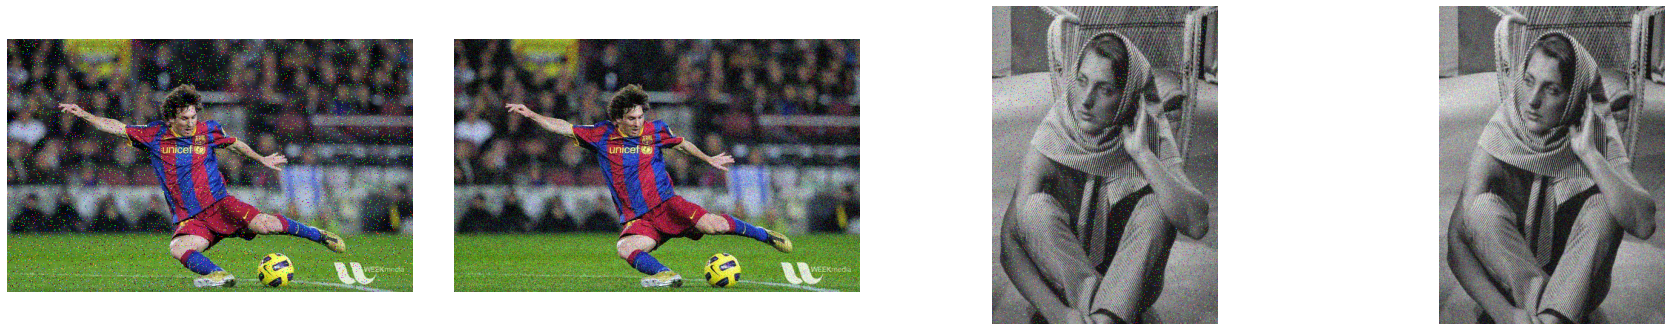

In [60]:
sp_noised_messi = random_noise(messi_image, mode="s&p")
gaussian_noised_messi = random_noise(messi_image, mode="gaussian")

sp_noised_barbara = random_noise(barbara_image, mode="s&p")
gaussian_noised_barbara = random_noise(barbara_image, mode="gaussian")

f, subplt = plt.subplots(1,4,figsize=(25,5))
plt.tight_layout()
subplt[0].axis('off')
subplt[0].imshow(sp_noised_messi)
subplt[1].axis('off')
subplt[1].imshow(gaussian_noised_messi)
subplt[2].axis('off')
subplt[2].imshow(sp_noised_barbara)
subplt[3].axis('off')
subplt[3].imshow(gaussian_noised_barbara)

## Define function to compare images with mse and psnr

In [61]:
def mse(image_1, image_2):
    return ((image_1 - image_2) ** 2).sum() / \
        (image_1.shape[0] * image_1.shape[1])


def psnr(image_1, image_2):
    mse_value = mse(image_1, image_2)
    return 10 * np.log((255**2) / mse_value)


def compare(image_1, image_2):
    mse_value = mse(image_1, image_2)
    psnr_value = psnr(image_1, image_2)
    print("MSE: {:.2f} PSNR: {:.2f}".format(mse_value, psnr_value))

## Defind function to process image

In [62]:
def applyDctTransform(block_size, image):
    image_height, image_width, channels = image.shape

    image_blocks = np.empty(
        (int(image_height / block_size), int(image_width / block_size)),
        dtype=object,
    )

    ## divid into blocks
    block_height, block_width = image_blocks.shape
    for i in range(block_width):
        for j in range(block_height):
            image_blocks[j,
                         i] = image[j * block_size:(j + 1) * block_size,
                                    i * block_size:(i + 1) * block_size, :, ]

    ## apply dct transform
    for i in range(block_width):
        for j in range(block_height):
            block = image_blocks[j, i]
            image_blocks[j, i] = [
                cv2.dct(block[:, :, x]) for x in range(channels)
            ]

    ## generate mask
    mask = np.zeros((block_size, block_size))
    mask[0:int(block_size / 2), 0:int(block_size / 2)] = 1

    ## apply mask
    for i in range(block_width):
        for j in range(block_height):
            for c in range(channels):
                image_blocks[j, i][c] = mask * image_blocks[j, i][c]

    for i in range(block_width):
        for j in range(block_height):
            image_blocks[j, i] = cv2.merge(
                tuple([
                    cv2.idct(image_blocks[j, i][x]) for x in range(channels)
                ]))

    result = np.copy(image)

    ## merge blocks
    for i in range(block_width):
        for j in range(block_height):
            result[j * block_size:(j + 1) * block_size,
                   i * block_size:(i + 1) * block_size, :, ] = image_blocks[j,
                                                                            i]
    print("Block Size: {}".format(block_size))
    compare(image, result)

    return result

## Getting Start

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Salt & Pepper Messi:
Block Size: 64
MSE: 0.03 PSNR: 145.07
Block Size: 16
MSE: 0.04 PSNR: 144.00
Block Size: 8
MSE: 0.04 PSNR: 143.97

Gaussian Messi:
Block Size: 64


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


MSE: 0.02 PSNR: 150.22
Block Size: 16
MSE: 0.02 PSNR: 149.01
Block Size: 8
MSE: 0.02 PSNR: 148.95

Salt & Pepper Barbara:
Block Size: 64


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


MSE: 0.04 PSNR: 143.73
Block Size: 16
MSE: 0.04 PSNR: 142.66
Block Size: 8
MSE: 0.04 PSNR: 142.70

Gaussian Barbara:
Block Size: 64


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


MSE: 0.03 PSNR: 146.31
Block Size: 16
MSE: 0.03 PSNR: 145.24
Block Size: 8
MSE: 0.03 PSNR: 145.29


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


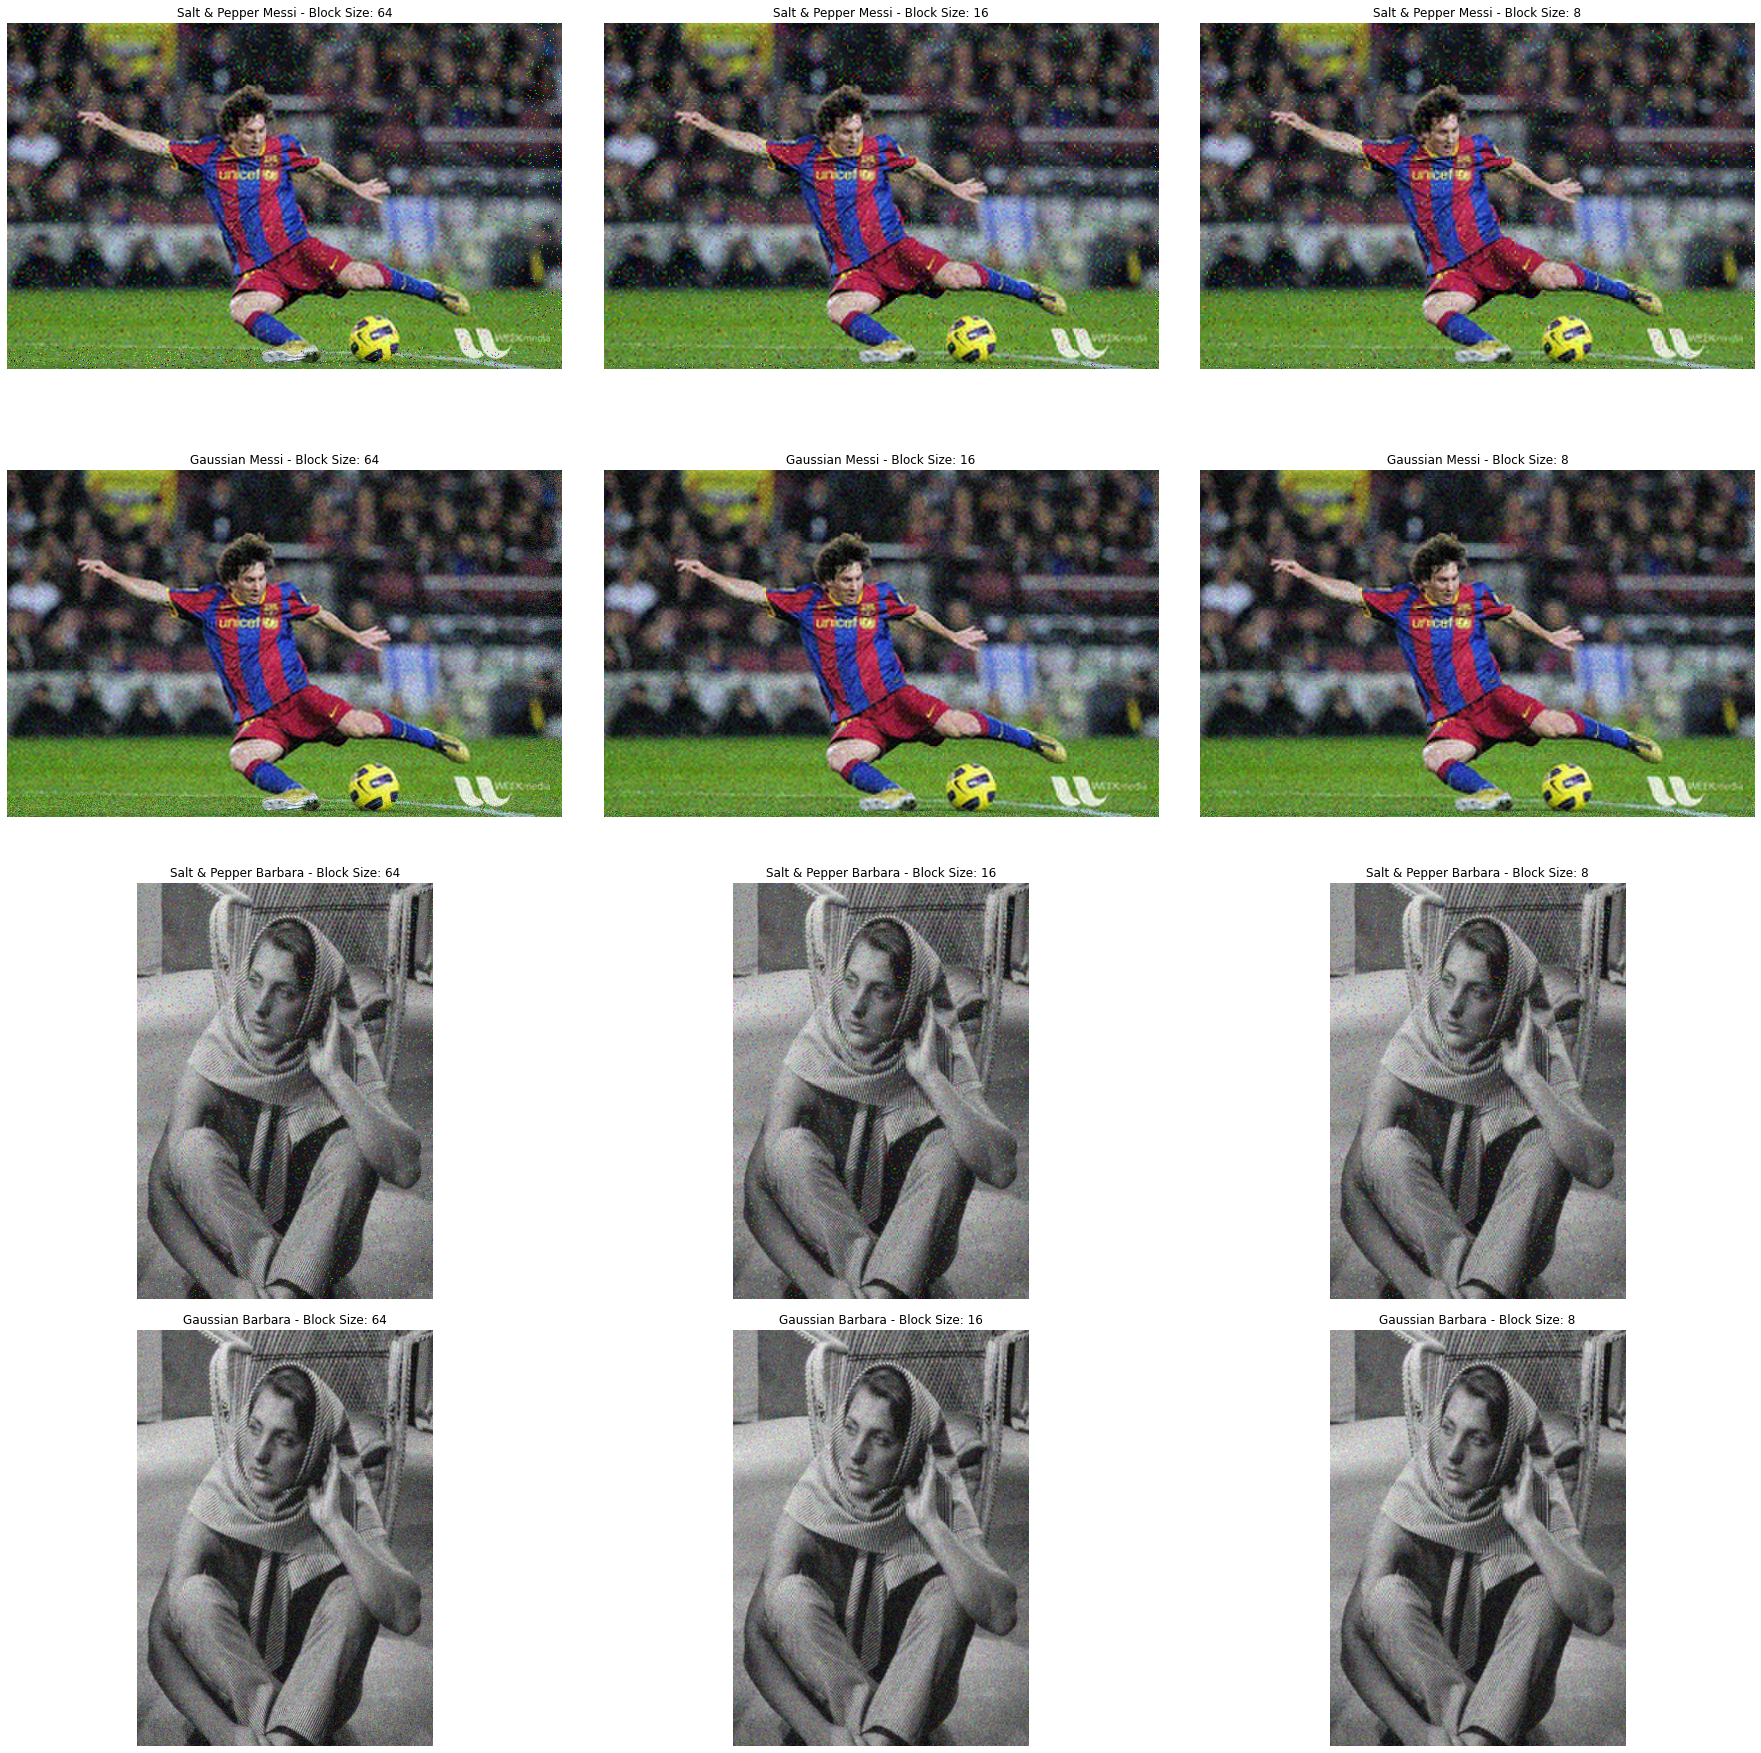

In [63]:
f, subplt = plt.subplots(4, 3, figsize=(25, 25))
plt.tight_layout()

block_sizes = [64, 16, 8]
i = 0
print("Salt & Pepper Messi:")
for block_size in block_sizes:
    result = applyDctTransform(block_size, sp_noised_messi)
    subplt[0][i].axis('off')
    subplt[0][i].imshow(result)
    subplt[0][i].set_title(
        'Salt & Pepper Messi - Block Size: {}'.format(block_size))
    i += 1
print()
i = 0
print("Gaussian Messi:")
for block_size in block_sizes:
    result = applyDctTransform(block_size, gaussian_noised_messi)
    subplt[1][i].axis('off')
    subplt[1][i].imshow(result)
    subplt[1][i].set_title(
        'Gaussian Messi - Block Size: {}'.format(block_size))
    i += 1
print()
i = 0
print("Salt & Pepper Barbara:")
for block_size in block_sizes:
    result = applyDctTransform(block_size, sp_noised_barbara)
    subplt[2][i].axis('off')
    subplt[2][i].imshow(result)
    subplt[2][i].set_title(
        'Salt & Pepper Barbara - Block Size: {}'.format(block_size))
    i += 1
print()
i = 0
print("Gaussian Barbara:")
for block_size in block_sizes:
    result = applyDctTransform(block_size, gaussian_noised_barbara)
    subplt[3][i].axis('off')
    subplt[3][i].imshow(result)
    subplt[3][i].set_title(
        'Gaussian Barbara - Block Size: {}'.format(block_size))
    i += 1

As result, according to the results dtc transform help to reduce noise in salt & pepper noise when the block size is 8x8 and in other images doesn't have too much effect